In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter

In [17]:
# define parameters and functions:
alpha = .95
epsilon = .1 #.1 gives things that look like solitons
L = 2*np.pi
V = 1600*alpha/2*(2*np.log(alpha)+1-alpha**2)
print(V)
D_ = 0.6 #very intereting with D=0.5 (which is the same as Ma=1/4) and D = 0.6

-3.8658074690768762


In [18]:
def RHS_static_cylinder(t,eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
    eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
    deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + D_*eta_z + epsilon**2*eta_zzz))).real
    #deta_dt += - V*alpha/2*fft.ifft(2*n*np.pi/L*1j*fft.fft((1+eta/alpha)**2)).real
    return deta_dt

def RHS_moving_cylinder(t,eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
    eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
    deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + D_*eta_z + epsilon**2*eta_zzz))).real
    deta_dt += - V*alpha/2*fft.ifft(2*n*np.pi/L*1j*fft.fft((1+eta/alpha)**2)).real
    return deta_dt

In [19]:
T = 48
k = int(1/np.sqrt(2)/epsilon)
print(k)
z = np.linspace(0, 2*np.pi, 100)
t = np.linspace(0,T, 300)
t_span = (0,T)
u0 = (1.1 - np.cos(z*k))/2 
print('Starting solve')
result_moving = scipy.integrate.solve_ivp(RHS_moving_cylinder, t_span, u0, 'BDF', rtol = 1e-1, t_eval =t)
u_moving = result_moving.y
print(np.shape(u_moving), ' solved moving')

result_static = scipy.integrate.solve_ivp(RHS_static_cylinder, t_span, u0, 'BDF', rtol = 1e-1, t_eval =t)
u_static = result_static.y
print(np.shape(u_static), ' solved static')

Z,T = np.meshgrid(z,t)

7
Starting solve
(100, 300)  solved moving
(100, 300)  solved static


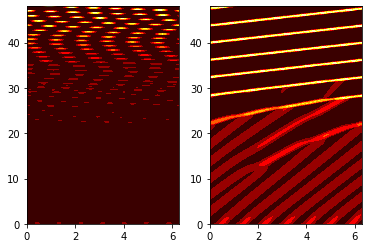

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

ax[0].contourf(Z,T,u_moving.T, cmap ='hot')
ax[1].contourf(Z,T,u_static.T, cmap ='hot')
#plt.colorbar()
plt.savefig('moving_cylinder_weird.jpg')

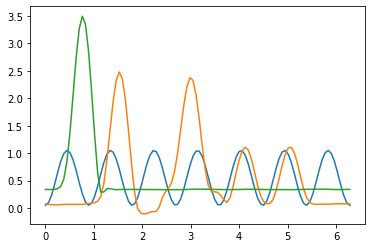

In [212]:
plt.plot(z, u0)
plt.plot(z, u_moving[:,-1])
plt.plot(z, u_static[:,-1])

In [204]:
(np.trapz(u0,z)-np.trapz(u_static[:,-1],z))/np.trapz(u0,z)

0.008433136698147414

In [205]:
(np.trapz(u0,z)-np.trapz(u_moving[:,-1],z))/np.trapz(u0,z)

0.018479259765777144